In [1]:
import pandas as pd
import numpy as np
import cv2  # for image processing
import scipy.io
import os
from arts_preprocess_utils import load_dataset, get_image
import scipy
#from scipy.spatial.distance import directed_hausdorff, cosine
from IPython import display
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from graph_utils import get_edge_dict, plot_graph

In [2]:
import zipfile

#dataset from Kaggle
filezip = zipfile.ZipFile('/root/work/datasets/train.zip', 'r')

## Load Data

**Artwork metadata**

In [3]:
#Artwork metadata

#df_artworks = pd.read_csv('/root/work/datasets/train_mayors_style_encoded.csv')
df_artworks = pd.read_csv('/root/work/datasets/train_mayors_style_w_encoded.csv')
df_artworks.head()

,filename,title,style,genre,date,artist,code
0,70944.jpg,Forbidden Land,Surrealism,landscape,1937.0,Wolfgang Paalen,[ 2.16620147e-01 4.68674958e-01 4.9970090...
1,99442.jpg,Storm at sea,Romanticism,marina,1873,Ivan Aivazovsky,[-0.51181263 0.13622466 -0.11437507 -0.183409...
2,28908.jpg,Yachting in the Mediterranean,Realism,genre painting,1896,Julius LeBlanc Stewart,[-0.32671657 0.04025012 0.08584028 -0.008758...
3,7486.jpg,Death of Eleazer,Romanticism,religious painting,1866,Gustave Dore,[-0.31175607 -0.0369959 -0.30558443 -0.460391...
4,35766.jpg,The-Deluge,Romanticism,religious painting,NaN,Gustave Dore,[ -2.20029309e-01 3.74831438e-01 -1.1139854...


**Artwork codes**

In [4]:
#Artwork codes

#artwork_code_matrix = np.load('/root/work/datasets/train_mayors_style_encode.npy')
artwork_code_matrix = np.load('/root/work/datasets/train_mayors_style_w_encoded.npy')
artwork_code_matrix.shape

(46010, 100)

**Influence graph**

In [5]:
df_edges = pd.read_csv('/root/work/datasets/artist-influences-edges.csv')
df_edges.head()

,Artist,Influence
0,Wolfgang Paalen,['C?sar Moro']
1,Ivan Aivazovsky,['Gevorg Bashinjaghian']
2,Odilon Redon,"['Rick Bartow', 'Nora Sumberg']"
3,Joseph Wright,['John Quidor']
4,Johannes Vermeer,"['Lars Physant', 'George Weissbort']"


In [6]:
#Create graph
artist_dict = get_edge_dict(df=df_edges, 
                            col_to_index='Artist', col_to_split='Influence', col_to_clean='Influence')

g_artist = nx.from_dict_of_lists(artist_dict)
nx.set_edge_attributes(g_artist, 'red', 'color')
nx.set_node_attributes(g_artist, 'artist', 'type')

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:882: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  "columns will be omitted.", UserWarning)


**Artwork pivot**

In [7]:
df_monet = df_artworks[df_artworks['artist'] == 'Claude Monet']
df_monet.head(10)

,filename,title,style,genre,date,artist,code
80,49757.jpg,"The Manneport, Rock Arch West of Etretat",Impressionism,landscape,1883,Claude Monet,[ 0.17839146 -0.38581029 -0.08663061 -0.092049...
255,41682.jpg,"Poppy Field, Argenteuil",Impressionism,landscape,1875,Claude Monet,[ -7.35479146e-02 -1.94092991e-03 -4.0434390...
256,37256.jpg,Gardener's House at Antibes,Impressionism,landscape,1888,Claude Monet,[ -2.23357715e-02 -2.03105211e-01 -2.5774693...
293,56641.jpg,Sunlight Effect under the Poplars,Impressionism,landscape,1887,Claude Monet,[ 1.89322007e+00 1.99197578e+00 -2.3988314...
304,52850.jpg,"Rouen Cathedral, the Portal, Morning Effect",Impressionism,cityscape,1894,Claude Monet,[ -1.46699131e-01 1.77485347e-02 -2.8347417...
313,97356.jpg,The?Allee?du Champ?de Foire?at Argenteuil,Impressionism,landscape,1874,Claude Monet,[ 3.91060770e-01 -2.12100983e-01 -3.4459528...
442,52023.jpg,Haystack at Giverny,Impressionism,landscape,1886,Claude Monet,[ 1.96630359e-01 -4.64092970e-01 1.0051748...
578,16139.jpg,Vetheuil,Impressionism,landscape,1879,Claude Monet,[ 1.80485451 -0.14021422 -0.41995153 0.532075...
627,61167.jpg,Camille Monet and a Child in the Artist?s Gard...,Impressionism,portrait,1875,Claude Monet,[-0.43663636 -0.24504219 -0.25994512 0.043585...
638,11233.jpg,Rouen Cathedral,Impressionism,cityscape,1893,Claude Monet,[ -1.72828957e-01 -2.68659741e-01 -2.0732183...


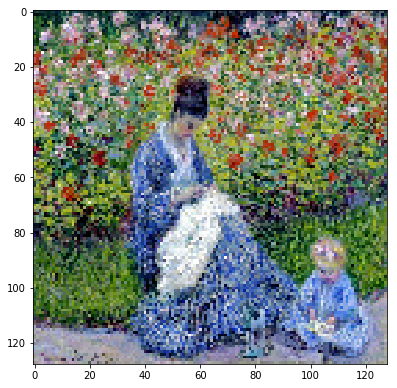

In [8]:
#Plot image
img_path = filezip.extract('train/' + df_monet['filename'][627])
image = get_image(img_path)

fig = plt.gcf()
fig.set_size_inches(14.5, 6.5)

plt.imshow(image[0][...,::-1])

In [9]:
fig.savefig('./image_result/query.jpg')

In [10]:
code_image = artwork_code_matrix[627]

## Get similar artworks 

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

sim_matrix = cosine_similarity(code_image.reshape((1,-1)), artwork_code_matrix)

In [12]:
sim_matrix.shape

(1, 46010)

In [13]:
index_sorted = np.argsort(sim_matrix)

In [15]:
top_n = index_sorted[0][-1001:-1]

In [20]:
top_n_matrix = np.take(a=sim_matrix, indices=top_n)
top_n_matrix.shape

(1000,)

**Get top n metadata**

In [39]:
df_top_n = df_artworks.iloc[top_n]
df_top_n['sim_distance'] = top_n_matrix
df_top_n.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,filename,title,style,genre,date,artist,code,sim_distance
18299,39135.jpg,Mother Awoken by Her Crying Child,Romanticism,genre painting,1831,Karl Bryullov,[ 0.21662366 0.74166697 -0.12450831 -0.108695...,0.254733
39999,5329.jpg,The Absinthe Drinker,Symbolism,portrait,1877,Felicien Rops,[ 0.08704481 -0.28201899 -0.00740384 2.782587...,0.254761
26009,57883.jpg,"Portrait of Margheride Geer, Wife of Jacob Trip",Baroque,portrait,NaN,Rembrandt,[ 4.24106479e-01 -5.97999580e-02 -5.2132125...,0.254934
23954,94229.jpg,Temple of Tanit,Art Nouveau (Modern),interior,1909,Konstantin Korovin,[ 1.20208609e+00 6.40053093e-01 -1.7252951...,0.254956
1911,83295.jpg,Ruins of Diocletian at Spalato,Romanticism,cityscape,1841,Rudolf von Alt,[ -1.87876791e-01 -4.58972067e-01 3.4993678...,0.254977


**Re-order taking account artist influence**

In [26]:
#Pre compute shortest path length
length = dict(nx.all_pairs_shortest_path_length(g_artist))

In [42]:
artist_ocurrence = 0

In [45]:
def sim_influence(sim_distance, artist_source, artist_target):
    global artist_ocurrence
    if artist_source == artist_target:
        artist_decay = 2 ** artist_ocurrence
        artist_ocurrence += 1
        return sim_distance * (1./artist_decay)
    if artist_target in length[artist_source]:
        return sim_distance * (1./length[artist_source][artist_target])
    else:
        return sim_distance * (1./100)

In [46]:
df_top_n['sim_influence'] = df_top_n.apply(
    lambda x: sim_influence(sim_distance=x['sim_distance'], artist_source='Claude Monet', artist_target=x['artist']),
    axis=1 )

df_top_n.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,filename,title,style,genre,date,artist,code,sim_distance,sim_influence
18299,39135.jpg,Mother Awoken by Her Crying Child,Romanticism,genre painting,1831,Karl Bryullov,[ 0.21662366 0.74166697 -0.12450831 -0.108695...,0.254733,0.063683
39999,5329.jpg,The Absinthe Drinker,Symbolism,portrait,1877,Felicien Rops,[ 0.08704481 -0.28201899 -0.00740384 2.782587...,0.254761,0.002548
26009,57883.jpg,"Portrait of Margheride Geer, Wife of Jacob Trip",Baroque,portrait,NaN,Rembrandt,[ 4.24106479e-01 -5.97999580e-02 -5.2132125...,0.254934,0.084978
23954,94229.jpg,Temple of Tanit,Art Nouveau (Modern),interior,1909,Konstantin Korovin,[ 1.20208609e+00 6.40053093e-01 -1.7252951...,0.254956,0.063739
1911,83295.jpg,Ruins of Diocletian at Spalato,Romanticism,cityscape,1841,Rudolf von Alt,[ -1.87876791e-01 -4.58972067e-01 3.4993678...,0.254977,0.002550


In [47]:
df_top_ten = df_top_n.sort_values(by=['sim_influence'], ascending=False)
df_top_ten = df_top_ten.head(10)
df_top_ten

**Plot artworks**

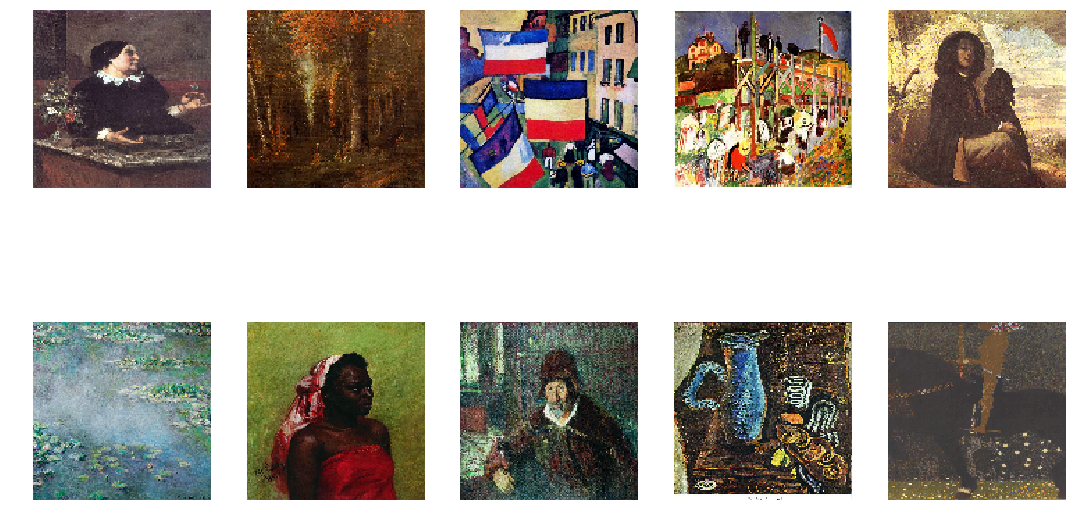

In [48]:
r, c = 2, 5
cnt= 0

relative_path = list(df_top_ten['filename'])
fig, axs = plt.subplots(r, c)

for i in range(r):
    for j in range(c):
        img_path = filezip.extract('train/' + relative_path[cnt])
        axs[i,j].imshow(get_image(img_path)[0][...,::-1])
        axs[i,j].axis('off')
        cnt += 1

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.show()


In [ ]:
fig.savefig('./image_result/query_result_wasserstein.jpg')